# Basic concepts of IFP visualisation

This notebook explains how to quantify and visualise IFP within one MD simulation to compare the individual IFP with each other and should be applied after filtering and aggregation based on interaction or time.

In [38]:
import pandas as pd
from IFPAggVis.ifpaggvis import aggregate
from IFPAggVis.ifpaggvis.visualise import plot_distance_distribution_sim_hist_line
from IFPAggVis.ifpaggvis.visualise import plot_circle_visualisation
from IFPAggVis.ifpaggvis.calculate import diff_function, calculate_where_diff_zero
import timeit
from sklearn.metrics import pairwise_distances_chunked
import os

In [39]:
file_path = "../../data/aggregated_files/aggregation_time/"
outpath = "../../data/aggregated_files/visualisations/"

ligand = 1
step_size = 1
filter_val_x2 = 0.2
name_file = "ligand_" + str(ligand) + "_x1_filter_" + str(step_size) + "_x2_filter_" + str(filter_val_x2) + "_time_based_aggregation"


# Check if outpath exists, otherwise create new directory
if not os.path.exists(outpath):
    os.makedirs(outpath)
    print(outpath + " was created!")

In [40]:
infile_temp = file_path + name_file + ".csv"

In [41]:
infile_temp

'../../data/aggregated_files/aggregation_time/ligand_1_x1_filter_1_x2_filter_0.2_time_based_aggregation.csv'

In [42]:
df_temp_agg = pd.read_csv(infile_temp, index_col=0)

In [43]:
df_temp_agg.head(3)

,ARG221_Anionic,ARG221_HBAcceptor,ARG221_HBDonor,ARG221_Hydrophobic,ARG96_Anionic,ARG96_HBAcceptor,ARG96_Hydrophobic,ASN124_Hydrophobic,ASP197_Hydrophobic,ASP208_Cationic,...,TYR272_HBAcceptor,TYR272_Hydrophobic,VAL195_Hydrophobic,VAL223_HBAcceptor,VAL223_HBDonor,VAL223_Hydrophobic,VAL250_HBAcceptor,VAL250_Hydrophobic,occurence,diff_to_prev
0,0,1,0,1,1,1,0,0,0,0,...,1,1,0,0,0,1,0,1,50,[]
1,0,1,0,1,1,1,0,0,0,0,...,1,1,0,0,0,1,0,1,2,2
2,0,0,0,1,1,1,0,0,0,0,...,1,1,0,0,0,1,0,1,68,2


In [44]:
keep_columns = df_temp_agg.columns[:-2].values.tolist()

In [45]:
keep_columns

['ARG221_Anionic',
 'ARG221_HBAcceptor',
 'ARG221_HBDonor',
 'ARG221_Hydrophobic',
 'ARG96_Anionic',
 'ARG96_HBAcceptor',
 'ARG96_Hydrophobic',
 'ASN124_Hydrophobic',
 'ASP197_Hydrophobic',
 'ASP208_Cationic',
 'ASP208_HBDonor',
 'ASP220_Cationic',
 'ASP220_HBDonor',
 'ASP220_Hydrophobic',
 'ASP95_Hydrophobic',
 'CYS127_Hydrophobic',
 'CYS202_Hydrophobic',
 'CYS273_HBAcceptor',
 'CYS273_Hydrophobic',
 'GLN249_HBAcceptor',
 'GLN249_HBDonor',
 'GLN249_Hydrophobic',
 'GLU126_Hydrophobic',
 'GLU275_Cationic',
 'GLU275_HBAcceptor',
 'GLU275_HBDonor',
 'GLU275_Hydrophobic',
 'GLY274_HBAcceptor',
 'HIS125_EdgeToFace',
 'HIS125_Hydrophobic',
 'HIS125_PiStacking',
 'HIS248_Hydrophobic',
 'HIS66_Hydrophobic',
 'HOH402_HBAcceptor',
 'HOH8_HBAcceptor',
 'ILE130_Hydrophobic',
 'ILE133_Hydrophobic',
 'LEU205_Hydrophobic',
 'MN401_VdWContact',
 'PHE225_HBDonor',
 'PHE276_Hydrophobic',
 'SER224_HBDonor',
 'THR226_HBDonor',
 'TRP206_EdgeToFace',
 'TRP206_HBDonor',
 'TRP206_Hydrophobic',
 'TRP206_PiStac

In [46]:
df_ifp_temp = df_temp_agg[keep_columns]


In [47]:
df_ifp_temp.head(3)

,ARG221_Anionic,ARG221_HBAcceptor,ARG221_HBDonor,ARG221_Hydrophobic,ARG96_Anionic,ARG96_HBAcceptor,ARG96_Hydrophobic,ASN124_Hydrophobic,ASP197_Hydrophobic,ASP208_Cationic,...,TYR134_Hydrophobic,TYR134_PiStacking,TYR272_HBAcceptor,TYR272_Hydrophobic,VAL195_Hydrophobic,VAL223_HBAcceptor,VAL223_HBDonor,VAL223_Hydrophobic,VAL250_HBAcceptor,VAL250_Hydrophobic
0,0,1,0,1,1,1,0,0,0,0,...,1,0,1,1,0,0,0,1,0,1
1,0,1,0,1,1,1,0,0,0,0,...,1,0,1,1,0,0,0,1,0,1
2,0,0,0,1,1,1,0,0,0,0,...,1,0,1,1,0,0,0,1,0,1


### Circular plot

In [48]:
outfile = outpath + name_file

In [49]:
all_dfs_dic, colours = aggregate.calculate_lengths_interaction(df_ifp_temp)
plot_circle_visualisation(all_dfs_dic, df_ifp_temp.columns.values.tolist(), colours, outfile)

### Calculate distances in matrix for aggregated IFP

In [50]:
X = df_ifp_temp.values
distances = next(pairwise_distances_chunked(X, n_jobs=-1, metric=diff_function, working_memory=4096))

In [51]:
distances

array([[ 0.,  1.,  2., ..., 30., 31., 30.],
       [ 1.,  0.,  1., ..., 29., 30., 29.],
       [ 2.,  1.,  0., ..., 28., 29., 28.],
       ...,
       [30., 29., 28., ...,  0.,  1.,  0.],
       [31., 30., 29., ...,  1.,  0.,  1.],
       [30., 29., 28., ...,  0.,  1.,  0.]])

In [52]:
new_ind = df_ifp_temp.reset_index(drop=True)
ident_val = calculate_where_diff_zero(distances,new_ind.index.tolist())



In [53]:
ident_val

[[10, array([40])],
 [12, array([16])],
 [13, array([15])],
 [18, array([20, 22, 24, 26])],
 [19, array([21, 23, 25])],
 [20, array([22, 24, 26])],
 [21, array([23, 25])],
 [22, array([24, 26])],
 [23, array([25])],
 [24, array([26])],
 [28, array([32])],
 [29, array([31])],
 [45, array([47, 49])],
 [47, array([49])],
 [48, array([50])],
 [58, array([104])],
 [59, array([61])],
 [69, array([71, 73, 75])],
 [70, array([72, 74])],
 [71, array([73, 75])],
 [72, array([74])],
 [73, array([75])],
 [76, array([78])],
 [90, array([92, 94])],
 [91, array([93, 95])],
 [92, array([94])],
 [93, array([95])],
 [99, array([109, 129])],
 [100, array([102])],
 [101, array([103])],
 [105, array([107, 111])],
 [106, array([112, 114, 126])],
 [107, array([111])],
 [108, array([110, 128, 130])],
 [109, array([129])],
 [110, array([128, 130])],
 [112, array([114, 126])],
 [114, array([126])],
 [115, array([117, 119, 127])],
 [116, array([118])],
 [117, array([119, 127])],
 [119, array([127])],
 [120, arra

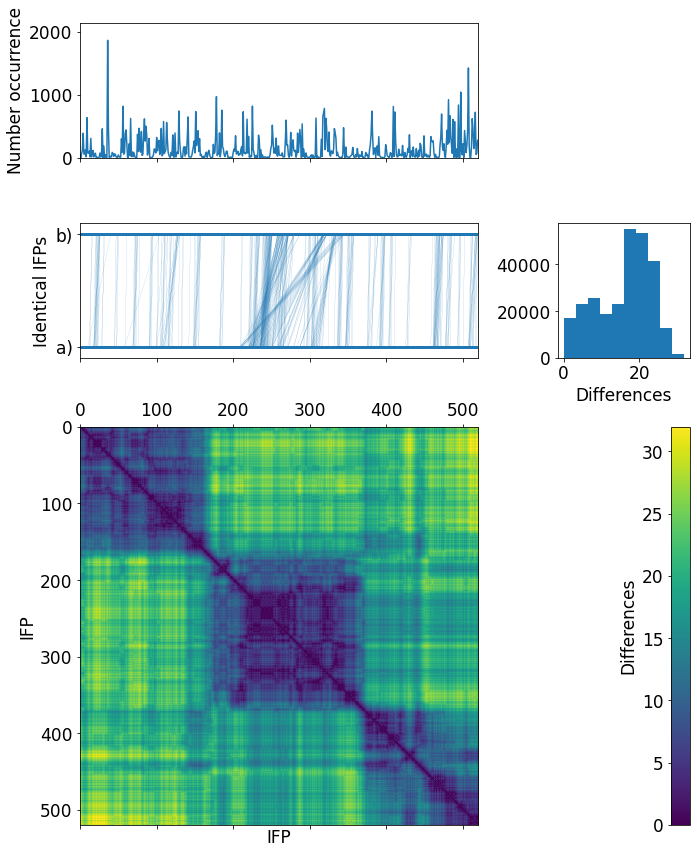

In [54]:
fig = plot_distance_distribution_sim_hist_line(distances, df_temp_agg["occurence"].values, ident_val, fontsize=17) 

In [55]:
fig.savefig(outpath + name_file + "_distance_matrix_distribution_similarity_hist.svg", dpi=600)

### Network visualisation

In [1]:
import networkx as nx
import dynetx as dn
from IFPAggVis.ifpaggvis.visualise import visualise_network_markers, get_unique_residue_position
from IFPAggVis.ifpaggvis.helpers import get_interaction_names, define_existing_edge_in_IFP

In [58]:
prot_residues = df_ifp_temp.columns.values

In [59]:
prot_residues

array(['ARG221_Anionic', 'ARG221_HBAcceptor', 'ARG221_HBDonor',
       'ARG221_Hydrophobic', 'ARG96_Anionic', 'ARG96_HBAcceptor',
       'ARG96_Hydrophobic', 'ASN124_Hydrophobic', 'ASP197_Hydrophobic',
       'ASP208_Cationic', 'ASP208_HBDonor', 'ASP220_Cationic',
       'ASP220_HBDonor', 'ASP220_Hydrophobic', 'ASP95_Hydrophobic',
       'CYS127_Hydrophobic', 'CYS202_Hydrophobic', 'CYS273_HBAcceptor',
       'CYS273_Hydrophobic', 'GLN249_HBAcceptor', 'GLN249_HBDonor',
       'GLN249_Hydrophobic', 'GLU126_Hydrophobic', 'GLU275_Cationic',
       'GLU275_HBAcceptor', 'GLU275_HBDonor', 'GLU275_Hydrophobic',
       'GLY274_HBAcceptor', 'HIS125_EdgeToFace', 'HIS125_Hydrophobic',
       'HIS125_PiStacking', 'HIS248_Hydrophobic', 'HIS66_Hydrophobic',
       'HOH402_HBAcceptor', 'HOH8_HBAcceptor', 'ILE130_Hydrophobic',
       'ILE133_Hydrophobic', 'LEU205_Hydrophobic', 'MN401_VdWContact',
       'PHE225_HBDonor', 'PHE276_Hydrophobic', 'SER224_HBDonor',
       'THR226_HBDonor', 'TRP206_EdgeToFac

If executed, new positions for residue nodes are generated

In [2]:
'''
pos_nodes_unique = get_unique_residue_position(prot_residues, 
                                               outfile = outpath + "LG" + str(ligand1) + "_LG" + str(ligand2))
'''

'\npos_nodes_unique = get_unique_residue_position(prot_residues, \n                                               outfile = outpath + "LG" + str(ligand1) + "_LG" + str(ligand2))\n'

Example how to reload generated positions for each residue in NW plot <br>
Generated above or in example script: 04-Get-coordinates-for-NW-visualisation-several-MC

In [60]:
import pickle

In [61]:
with open('../../data/aggregated_files/LG1_LG2_unique_residue_position.pkl', 'rb') as fp:
    pos_nodes_unique = pickle.load(fp)
fp.close()

In [62]:
pos_nodes_unique

{'LIG': (3453.6, 3343.8),
 'HIS248': (5910.5, 2358.1),
 'ASN219': (2896.4, 18.0),
 'ASP210': (1902.8, 6292.0),
 'SER224': (5115.7, 2554.5),
 'ASN131': (1693.9, 2825.3),
 'ARG96': (918.54, 1238.9),
 'ARG132': (5888.6, 1328.7),
 'TRP206': (2643.3, 613.76),
 'ASP208': (4816.3, 402.57),
 'ARG221': (3525.1, 699.52),
 'GLY222': (46.796, 3170.6),
 'CYS202': (6736.8, 2832.3),
 'ASP220': (6214.8, 4042.6),
 'GLY274': (3744.0, 6357.4),
 'GLN249': (4527.5, 1181.3),
 'TYR272': (5466.5, 798.88),
 'HOH402': (728.6, 5285.2),
 'GLU275': (298.95, 4408.4),
 'HIS125': (1262.7, 4692.3),
 'LEU205': (2468.1, 1958.3),
 'PHE276': (1042.4, 1880.0),
 'ASN124': (4855.5, 5688.0),
 'SER129': (5445.7, 6053.7),
 'LEU201': (3169.9, 6678.1),
 'GLU126': (4015.6, 88.263),
 'TYR134': (6099.4, 5353.1),
 'ASP197': (2426.5, 4157.2),
 'HIS66': (2032.5, 1010.4),
 'CYS127': (6458.5, 1910.2),
 'PHE225': (3796.7, 5442.6),
 'ILE130': (5017.7, 3626.5),
 'PHE267': (1510.8, 638.36),
 'CYS273': (2293.9, 5268.3),
 'VAL250': (5494.7, 48

##### Define graph for visualisation
with all nodes and interaction types

It is important to name ligand LIG, as further processing uses this keyword to access the node. <br>
Add ligand node to graph

In [63]:
ligand_name = "LIG"

Define list with protein residues (i.e. interacting residues) that interact with ligand

In [64]:
col_nodes = range(0,len(prot_residues),1)

Analyse interacting residues type, put in dictionary for further processing

In [65]:
labeldict_int, int_type = get_interaction_names(prot_residues, col_nodes,
                                                ligand_name)
node_colouring, edge_list = define_existing_edge_in_IFP(df_ifp_temp, ligand_name, col_nodes, 5, 3)


Assign pre-computed residue (node) positions to interactions detected here, as one residue can have multiple interactions with the ligand

In [66]:
def get_residue_int_type_position(interactions, pos_nodes_unique):
    
    position_dic = {}
    for key, val in interactions.items():
        position_dic [key] = pos_nodes_unique[val]
        
    return position_dic

In [67]:
pos_nodes = get_residue_int_type_position(labeldict_int, pos_nodes_unique)

Define a dynamic graph since IFP contains temporal data with different interactions

In [68]:
g = dn.DynGraph(edge_removal=True)

Add different edges of temporal data to dynamic graph

In [69]:
i = 0
while i < len(edge_list):
    g.add_interactions_from(edge_list[i],t=i)
    i+=1 

Define outfile and save interactions to star graph visualisations.<br>
Different options for export are available and default is to also save a plot of occurence of an individual IFP to file.<br>
Different interactions are marked with glyphs in the images. <br>

In [70]:
outfile = outpath + name_file + "_network_"

In [71]:
outfile

'../../data/aggregated_files/visualisations/ligand_1_x1_filter_1_x2_filter_0.2_time_based_aggregation_network_'

In [72]:
number_nws = len(df_ifp_temp)
number_ifps = df_temp_agg["occurence"]
occ_ifps = number_ifps#[:number_nws]


In [73]:
visualise_network_markers(number_nws, occ_ifps, g, pos_nodes, node_colouring, labeldict_int, int_type, outfile, False, save_nw = True, axes_nw = False, scale_axis = 0.1, dpi=1200)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 520/520 [01:30<00:00,  5.78it/s]


Sort df by values to check most frequently occuring NWs

In [74]:
df_temp_agg.sort_values('occurence',ascending=False).head(3)

,ARG221_Anionic,ARG221_HBAcceptor,ARG221_HBDonor,ARG221_Hydrophobic,ARG96_Anionic,ARG96_HBAcceptor,ARG96_Hydrophobic,ASN124_Hydrophobic,ASP197_Hydrophobic,ASP208_Cationic,...,TYR272_HBAcceptor,TYR272_Hydrophobic,VAL195_Hydrophobic,VAL223_HBAcceptor,VAL223_HBDonor,VAL223_Hydrophobic,VAL250_HBAcceptor,VAL250_Hydrophobic,occurence,diff_to_prev
36,0,0,0,1,1,1,1,0,0,0,...,1,1,0,0,0,1,0,1,1864,2
507,0,0,0,0,0,0,0,1,1,1,...,0,0,1,0,1,1,1,1,1425,2
497,0,0,1,0,0,0,0,1,1,1,...,0,0,1,0,1,1,1,1,1042,2
